# Import modules

In [1]:
# 한국어 폰트 다운로드
# 런타임 -->  세션 다시시작 필요

#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
!pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter # element 개수 셀 때 사용
from wordcloud import WordCloud

In [4]:
!pip install konlpy
import konlpy

In [5]:
# clustering
! pip install soyclustering
from sklearn.feature_extraction.text import CountVectorizer # 벡터화
from sklearn.feature_extraction.text import TfidfTransformer # tfidf
from soyclustering import SphericalKMeans # clustering

In [6]:
from google.colab import files
file = files.upload()

ModuleNotFoundError: No module named 'google.colab'

## 데이터 읽어오기
블로그 신한생명 검색 결과로 저장한 json 파일을 읽어오시오

In [7]:
# from google.colab import files
# file = files.upload()

In [8]:
df_blog = pd.read_json("./naver_blog.json")
df_blog.head()

,title,link,description,bloggername,bloggerlink,postdate
0,뷰티풀 민트 라이프 2023 뮤직 페스티벌 뷰민라 <b>포스코</b> 팝업...,https://blog.naver.com/pih870318/223103807388,2023 뮤직 페스티벌 뷰민라 뷰티풀 민트 라이프 <b>포스코</b> 팝업 포석호 ...,초코혜 365일 매일이 여행 ♪,blog.naver.com/pih870318,20230516
1,♣ 5월 <b>포스코</b> 그룹주 주가 흐름,https://blog.naver.com/photoman75/223101456174,"© traxer, 출처 Unsplash <b>포스코</b> 그룹주가 3월 이후 수급...",숨 그리고 삶,blog.naver.com/photoman75,20230514
2,문현 <b>포스코</b> 센트럴포레 부적격세대 알아보세요,https://blog.naver.com/guen1600/223071175085,문현 <b>포스코</b> 센트럴포레 부적격세대 선착순 공급안내 문현 센트럴포레 <b...,돈 걱정 없는 인생 만들기,blog.naver.com/guen1600,20230411
3,문현 <b>포스코</b> 센트럴포레 문현동 마루 아파트,https://blog.naver.com/sanbok91/223086651151,문현 <b>포스코</b> 센트럴포레 문현동 마루 아파트 정부의 부동산 규제 완화책 ...,부동산스토리,blog.naver.com/sanbok91,20230427
4,문현 <b>포스코</b> 센트럴포레 부적격세대 현장소식,https://blog.naver.com/wpthdud0/223085508053,문현 센트럴포레 - 시공사 <b>포스코</b> 건설 2022년 4월 사업승인 신청을...,하하하이모의 부동산정보,blog.naver.com/wpthdud0,20230426


##### description 내용만 list로 반환

In [9]:
descriptions = df_blog["description"].to_list() # 블로그 내용
descriptions[0:3]

['2023 뮤직 페스티벌 뷰민라 뷰티풀 민트 라이프 <b>포스코</b> 팝업 포석호 캐릭터 인증샷 이벤트까지... 이번 뷰티풀 민트 라이프 2023에는 게보린, <b>포스코</b>, 뮤직카우 등의 부스를 만날 수 있었는데요. 사실 <b>포스코</b>에서... ',
 '© traxer, 출처 Unsplash <b>포스코</b> 그룹주가 3월 이후 수급이 몰리면서 급등한 후 4월 20일 이후 조정을 받으며 하락하고 있다. <b>포스코</b>인터내셔널은 <b>포스코</b>그룹주중에서 가장 늦게 발동이 걸리며 4월 13일 종가 22,250원... ',
 '문현 <b>포스코</b> 센트럴포레 부적격세대 선착순 공급안내 문현 센트럴포레 <b>포스코</b> 아파트는 부산광역시 남구 문현동 334번지 일원에 위치하는 지역주택조합 아파트입니다. <b>포스코</b> 건설이 시공할 예정이며... ']

## KoNLPy를 이용한 단어 분석
KoNLPy: 파이썬 한국어 NLP
- 형태소 분석
 - Hannanum: 한나눔. KAIST Semantic Web Research Center 개발
 - Kkma: 꼬꼬마. 서울대학교 IDS 연구실 개발
 - Komoran: 코모란. Shineware에서 개발
 - Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정
 - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기

*참고: https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

##### Question: Okt를 활용하여 첫 번째 문장의 형태소를 분석해보자

In [10]:
# !pip install knolpy
from konlpy.tag import Okt

parser_kor = Okt()
parser_kor.pos(descriptions[0])[:10]

[('2023', 'Number'),
 ('뮤직', 'Noun'),
 ('페스티벌', 'Noun'),
 ('뷰민', 'Noun'),
 ('라', 'Josa'),
 ('뷰티풀', 'Noun'),
 ('민트', 'Noun'),
 ('라이프', 'Noun'),
 ('<', 'Punctuation'),
 ('b', 'Alpha')]

##### Question: descriptions의 모든 문장의 형태소를 분석해보자

In [11]:
morphs = []         # 단어를 담을 리스트
for sentence in descriptions:                     # 리스트에서 각 문장 추출
    morphs.append(parser_kor.pos(sentence))  # 문장별 형태소 분석 결과 추가

In [12]:
morphs[2]

[('문', 'Modifier'),
 ('현', 'Noun'),
 ('<', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('포스코', 'Noun'),
 ('</', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('센트럴', 'Noun'),
 ('포레', 'Noun'),
 ('부적', 'Noun'),
 ('격', 'Noun'),
 ('세대', 'Noun'),
 ('선착순', 'Noun'),
 ('공급', 'Noun'),
 ('안내', 'Noun'),
 ('문', 'Modifier'),
 ('현', 'Noun'),
 ('센트럴', 'Noun'),
 ('포레', 'Noun'),
 ('<', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('포스코', 'Noun'),
 ('</', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('아파트', 'Noun'),
 ('는', 'Josa'),
 ('부산광역시', 'Noun'),
 ('남구', 'Noun'),
 ('문현동', 'Noun'),
 ('334', 'Number'),
 ('번지', 'Noun'),
 ('일원', 'Noun'),
 ('에', 'Josa'),
 ('위치', 'Noun'),
 ('하는', 'Verb'),
 ('지역', 'Noun'),
 ('주택조합', 'Noun'),
 ('아파트', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('<', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('포스코', 'Noun'),
 ('</', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('건설', 'Noun'),
 ('이', 'Jos

##### Question: descriptions의 모든 문장에서 명사만 추출해보자

In [15]:
noun_list=[]  # 명사만 모은 리스트
for wt in morphs: # description 별 pos tagging결과
    noun_list += [word for word, tag in wt if tag == 'Noun' ]

In [16]:
print(", ".join(noun_list))

뮤직, 페스티벌, 뷰민, 뷰티풀, 민트, 라이프, 포스코, 팝업, 포석, 호, 캐릭터, 인증샷, 이벤트, 이번, 뷰티풀, 민트, 라이프, 게보린, 포스코, 뮤직, 등, 부스, 만날, 수, 사실, 포스코, 출처, 포스코, 그룹, 주가, 이후, 수급, 급등, 후, 이후, 조정, 하락, 포스코, 인터내셔널, 포스코, 그룹, 주중, 가장, 발동, 종가, 현, 포스코, 센트럴, 포레, 부적, 격, 세대, 선착순, 공급, 안내, 현, 센트럴, 포레, 포스코, 아파트, 부산광역시, 남구, 문현동, 번지, 일원, 위치, 지역, 주택조합, 아파트, 포스코, 건설, 시공, 예정, 현, 포스코, 센트럴, 포레, 문현동, 마루, 아파트, 정부, 부동산, 규제, 완화, 책, 이후, 여러, 지표, 개선, 측면, 양호, 입지, 지역, 주택조합, 아파트, 현, 포스코, 센트럴, 포레, 소개, 현, 센트럴, 포레, 시공사, 포스코, 건설, 사업, 승인, 신청, 사업, 승인, 오늘, 중, 생활환경, 화제, 현, 포스코, 센트럴, 포레, 대해, 현, 포스코, 센트럴, 포레, 문현동, 아파트, 조합원, 선착순, 마루, 지역, 주택조합, 부산광역시, 남구, 문현동, 번지, 일원, 사업, 부지, 현, 포스코, 센트럴, 포레, 사업, 승인, 접수, 소식, 조합원, 자격, 현, 포스코, 센트럴, 포레, 문현동, 아파트, 분양, 정보, 부적, 격, 세대, 이번, 시즌, 가장, 핫, 곳, 수, 현, 포스코, 센트럴, 포레, 아파트, 공급, 소식, 마루, 지역, 주택조합, 부적, 격, 세대, 마지막, 포스코, 건설, 신규, 아파트, 연동, 더, 애비뉴, 공급, 제주, 연동, 포스코, 더, 주한, 병원, 주변, 위치, 것, 확인, 수, 주한, 병원, 포스코, 엠텍, 리튬, 리튬, 주, 말, 이, 회사, 철광석, 산소, 분리, 고순, 알루미늄, 탈산제, 직접, 생산, 기업, 포스코, 의, 직계, 회사, 중, 현, 포스코, 센트럴, 포레, 남구, 최, 중심, 위치, 현장, 면적, 제곱미터, 현, 포스코, 센트럴,

##### Question: 각 명사가 출현한 빈도를 체크해보자

In [17]:
Counter(noun_list).most_common(10)

[('포스코', 223),
 ('그룹', 23),
 ('사업', 23),
 ('홀딩스', 23),
 ('주가', 21),
 ('오늘', 17),
 ('주', 15),
 ('기업', 15),
 ('현', 13),
 ('센트럴', 13)]

##### Question: 5번이 넘게 나온 단어들 목록을 탐색하고, 불필요한 명사 리스트를 만들어보자

In [18]:
worddict = Counter(noun_list) # key : 단어, value : 등장횟수

over_5 = [k for k, v in worddict.items() if int(v)>5]
over_5

['포스코',
 '등',
 '수',
 '그룹',
 '주가',
 '인터내셔널',
 '현',
 '센트럴',
 '포레',
 '아파트',
 '위치',
 '지역',
 '건설',
 '사업',
 '오늘',
 '중',
 '대해',
 '분양',
 '곳',
 '더',
 '것',
 '엠텍',
 '주',
 '이',
 '회사',
 '기업',
 '의',
 '엠',
 '실적',
 '주식',
 '퓨처엠',
 '스틸',
 '리온',
 '홀딩스',
 '케미칼',
 '부문',
 '상승',
 '에코',
 '철강',
 '및',
 '종목',
 '관련',
 '업체',
 '지원',
 '사거리',
 '센터',
 '점',
 '한화',
 '삼성',
 '금',
 '투자',
 '포항',
 '교육']

In [19]:
# 불필요한 명사 리스트
removelist = ['것', '중', '수', '이', '등', '대해', '비', '더', '가기', '의',
              '또', '명', '후', '좀', '별', '율', '나', '분', '무', '및', '뷰', '엠','주', '현', '포스코']

##### Question: 불필요한 명사 리스트를  worddict에서 제거해보자

In [20]:
for word in removelist:
    if word in worddict.keys():
        del worddict[word]

worddict.most_common(30)

[('그룹', 23),
 ('사업', 23),
 ('홀딩스', 23),
 ('주가', 21),
 ('오늘', 17),
 ('기업', 15),
 ('센트럴', 13),
 ('포레', 13),
 ('인터내셔널', 12),
 ('아파트', 12),
 ('관련', 12),
 ('케미칼', 11),
 ('건설', 10),
 ('엠텍', 10),
 ('회사', 9),
 ('주식', 9),
 ('스틸', 9),
 ('종목', 9),
 ('포항', 9),
 ('위치', 8),
 ('지역', 8),
 ('리온', 7),
 ('상승', 7),
 ('에코', 7),
 ('지원', 7),
 ('사거리', 7),
 ('센터', 7),
 ('점', 7),
 ('삼성', 7),
 ('금', 7)]

## WordCloud 만들기

##### Question: wordcloud 인스턴스 선언

In [21]:
# font_path = './NanumGothic.ttf'
# background_color='white'
# colormap = 'Accent_r'
# width = 800
# height = 800
wordcloud = WordCloud(
    font_path = './NanumGothic.ttf', #한글 사용 위해서 /usr/share/fonts/truetype/nanum
    background_color='white',       # 배경 색깔 정하기
    colormap = 'Blues_r',          # 폰트 색깔" Accent_r, Blues_r, CMRmap_r, viridis_r, rainbow_r, Set1_r, Spectral_r, Pastel1_r
    width = 800,
    height = 800
)

In [23]:
worddict

Counter({'그룹': 23,
         '사업': 23,
         '홀딩스': 23,
         '주가': 21,
         '오늘': 17,
         '기업': 15,
         '센트럴': 13,
         '포레': 13,
         '인터내셔널': 12,
         '아파트': 12,
         '관련': 12,
         '케미칼': 11,
         '건설': 10,
         '엠텍': 10,
         '회사': 9,
         '주식': 9,
         '스틸': 9,
         '종목': 9,
         '포항': 9,
         '위치': 8,
         '지역': 8,
         '리온': 7,
         '상승': 7,
         '에코': 7,
         '지원': 7,
         '사거리': 7,
         '센터': 7,
         '점': 7,
         '삼성': 7,
         '금': 7,
         '교육': 7,
         '분양': 6,
         '곳': 6,
         '실적': 6,
         '퓨처엠': 6,
         '부문': 6,
         '철강': 6,
         '업체': 6,
         '한화': 6,
         '투자': 6,
         '이후': 5,
         '가장': 5,
         '문현동': 5,
         '주택조합': 5,
         '연동': 5,
         '리튬': 5,
         '기록': 5,
         '상한': 5,
         '소재': 5,
         '위': 5,
         '그': 5,
         '분석': 5,
         '개인': 5,
         '매수': 5,
       

##### Question: worddict을 이용하여 wordcloud 생성

In [24]:
wordcloud.generate_from_frequencies(worddict)

##### Question: wordcloud 출력

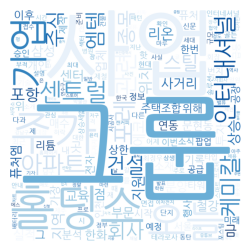

In [25]:
fig = plt.figure(figsize=(3, 3))  # 그림 크기 설정
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Clustering

## KoNLPy를 이용한 단어 분석
- 형태소 분석
 - Hannanum: 한나눔. KAIST Semantic Web Research Center 개발
 - Kkma: 꼬꼬마. 서울대학교 IDS 연구실 개발
 - Komoran: 코모란. Shineware에서 개발
 - Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정
 - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기

##### Komoran를 활용하여 첫 번째 문장의 형태소를 분석 (Okt와 동일한 방식)

### CounterVectorizer 작동 예제

CountVectorizer: 단어들의 카운트(출현 빈도)로 문서를 벡터화 (단어는 모두 소문자로 변환시켜서 셈)

In [26]:
# example data
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

#### 1-gram (각 단어를 feature로)

##### countvectorizer 생성 및 학습

In [27]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X
# 4 문서 갯수 9: 단어 갯수

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [28]:
type(X)

scipy.sparse._csr.csr_matrix

- scipy.sparse.csr.csr_matrix: compressed spares row matrix
- toarray(): csr_mtrix를 dense ndarry representation으로 반환해주는 메소드

##### compressed sparse matrix를 array 형태로 변환

In [29]:
# 'This is the first document.', [0, 1, 1, 1, 0, 0, 1, 0, 1]
#  'This is the first document.',
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [30]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

##### 단어 출현 빈도 확인

In [31]:
vectorizer.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

### Countervectorizer with frequent noun

##### frequent 정의
noun_freq (5번 이상 사용된 명사들), komoran.nouns() 활용

In [32]:
nouns = []
for sentence in descriptions:
    nouns += parser_kor.nouns(sentence)
noun_counter = Counter(nouns)
nouns_over2 = [word for word, freq in noun_counter.items() if freq >= 2] # 5번 이상 나온 명사들의 리스트

In [33]:
nouns_over2[:5] # 5번 이상 나온 word

['뮤직', '뷰티풀', '민트', '라이프', '포스코']

In [34]:
# 문장 --> tokenizer --> 명사만 남김
# 명사 중에서 전체 에서에서 2번 이상 나온 경우의 명사 남김
# 미리 2번 이상 나오는 단어 집합이 필요합니다. (noun_freq 를 미리 만들어야함)

noun_description = []
for description in descriptions:
  desc_nouns_all = parser_kor.nouns(description)
  desc_nouns_over2 = [word for word in desc_nouns_all if word in nouns_over2]
  noun_description.append(' '.join(desc_nouns_over2))




In [35]:
print(noun_description[0])
print(noun_description[1])
print(noun_description[2])


뮤직 뷰티풀 민트 라이프 포스코 팝업 이번 뷰티풀 민트 라이프 포스코 뮤직 등 수 사실 포스코
출처 포스코 그룹 주가 이후 급등 후 이후 하락 포스코 인터내셔널 포스코 그룹 가장
현 포스코 센트럴 포레 부적 격 세대 선착순 공급 안내 현 센트럴 포레 포스코 아파트 부산광역시 남구 문현동 번지 일원 위치 지역 주택조합 아파트 포스코 건설 시공 예정


##### CountVectorizer에 커스텀 토크나이저 적용하여 countervectorize 생성 및 학습

In [36]:
# 문장 -> 벡터화 (TF-IDF) -> 비슷한 벡터끼리 모으기 --> 클러스터가 만들어짐
# TF-IDF 하려면 counter vecterizer를 만들어야함


vectorizer = CountVectorizer() # 한국어 pos, 명사, freq>2
X = vectorizer.fit_transform(noun_description) # 한국어를 잘하게 된다.
X
# 100 : 전체 document 수 ( 블로그 글 갯수)
# 395 : 명사, frequency 2 이상인 명사들의 집합

<100x326 sparse matrix of type '<class 'numpy.int64'>'
	with 971 stored elements in Compressed Sparse Row format>

##### feature names 확인 & compressed sparse matrix to array & 단어 출현 빈도 확인

In [37]:
vectorizer.get_feature_names_out()

array(['가운데', '가장', '강남구', '강세', '강의', '강판', '개발', '개인', '거래', '건물', '건설',
       '견적', '경우', '계열', '고등학교', '골든', '공급', '공원', '공인', '공장', '관련', '관심',
       '광양', '교육', '국내', '규모', '그동안', '그루', '그룹', '금요일', '급등', '기간', '기념',
       '기록', '기본', '기술', '기억', '기업', '기자', '기획', '김승환', '김해', '나눔', '남구',
       '내용', '노량진', '다과', '다른', '단일', '단지', '당사', '대비', '대세', '대장', '대책',
       '대치동', '대표', '대한', '대해', '도안', '돌파', '동문', '동안', '동탄', '디자인', '때문',
       '라벨', '라이프', '리온', '리튬', '마련', '마루', '맛집', '맞춤', '매도', '매매', '매수',
       '매장', '면접', '모집', '목표', '문현동', '뮤직', '미래', '미술관', '민트', '박물관',
       '발표', '방법', '배당금', '배터리', '밸류', '번지', '벡셀', '별로', '병원', '보고', '보상',
       '보유', '복기', '부문', '부산광역시', '부적', '분석', '분양', '뷰티풀', '비즈', '사거리',
       '사건', '사람', '사명', '사무소', '사실', '사업', '사옥', '사진', '사회', '삼성', '삼성동',
       '상생', '상승', '상승세', '상한', '서울', '선릉', '선정', '선착순', '설명', '세대', '세부',
       '섹터', '센터', '센트럴', '소개', '소상', '소식', '소재', '소통', '솔루션', '수제',
       '스마트', '스타벅스', '스탬핑', '스토어', '스틸', 

In [38]:
X.toarray()[0] # 첫번째 블로그 글, 0 이 이미 많음

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,

In [39]:
vectorizer.vocabulary_

{'뮤직': 82,
 '뷰티풀': 105,
 '민트': 85,
 '라이프': 67,
 '포스코': 293,
 '팝업': 289,
 '이번': 193,
 '사실': 112,
 '출처': 270,
 '그룹': 28,
 '주가': 234,
 '이후': 196,
 '급등': 30,
 '하락': 302,
 '인터내셔널': 200,
 '가장': 1,
 '센트럴': 132,
 '포레': 292,
 '부적': 102,
 '세대': 128,
 '선착순': 126,
 '공급': 16,
 '안내': 161,
 '아파트': 160,
 '부산광역시': 101,
 '남구': 43,
 '문현동': 81,
 '번지': 92,
 '일원': 204,
 '위치': 188,
 '지역': 250,
 '주택조합': 241,
 '건설': 10,
 '시공': 147,
 '예정': 178,
 '마루': 71,
 '정부': 225,
 '입지': 206,
 '소개': 133,
 '시공사': 148,
 '사업': 113,
 '승인': 145,
 '신청': 154,
 '오늘': 179,
 '대해': 58,
 '조합원': 232,
 '접수': 221,
 '소식': 135,
 '자격': 207,
 '분양': 104,
 '정보': 224,
 '연동': 172,
 '애비뉴': 162,
 '제주': 229,
 '주한': 242,
 '병원': 95,
 '주변': 239,
 '확인': 321,
 '엠텍': 170,
 '리튬': 69,
 '회사': 323,
 '기업': 37,
 '공원': 17,
 '퓨쳐': 299,
 '실적': 157,
 '미래': 83,
 '요새': 184,
 '시장': 150,
 '주식': 240,
 '코스닥': 278,
 '주목': 237,
 '퓨처엠': 298,
 '신고': 151,
 '기록': 33,
 '스틸': 144,
 '리온': 68,
 '상한': 122,
 '홀딩스': 316,
 '당사': 50,
 '사명': 110,
 '케미칼': 277,
 '부문': 100,
 '에너지': 167,
 '소

## TF-IDF
어떤 단어의 빈도가 문서 내에서는 높은 편이 아니더라도, 해당 단어가 나타나는 문서가 적다면 문서를 대표하는 중요한 단어가 될 수 있음
![image.png](attachment:image.png)

##### tf-idf 학습

In [40]:
tfidf = TfidfTransformer()
# X " counter vectorize result"
X_tfidf = tfidf.fit_transform(X)

##### tf-idf 하기 전/후 비교

In [41]:
X.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,

In [42]:
X_tfidf.toarray()[0] # 중요도를 곱해줌

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.46356395, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## clustering
- 텍스트를 벡터화 완료
- 벡터끼리의 연산 가능해짐


##### Spherical k-means
- sparse vector의 clustering을 위해 활용
- cosine distance 활용
- 모든 데이터 포인트를 unit vector가 되도록 변형해서 이용
- centroid로 한 군집에 포함된 모든 벡터의 평균을 사용하지 않고, 벡터의 합을 L2 normalize 하여 centroid를 unit vector로 만듦
- 특별한 initialize 방법 사용

This package is implementation of Improving spherical k-means for document clustering: Fast initialization, sparse centroid projection, and efficient cluster labeling (Kim et al., 2020).

##### spherical k-means 인스턴스 생성 및 학습
cluster 수 = 4

In [43]:
np.int = np.int32
kmeans = SphericalKMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_tfidf)
labels

array([1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 3, 1, 3, 1, 3, 3, 0, 3, 2, 0,
       1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 1, 3, 3, 1, 1, 3, 2, 3, 0, 1, 2, 2,
       1, 0, 1, 1, 1, 3, 2, 1, 3, 0, 2, 1, 1, 1, 3, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 3, 1, 1, 3, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3,
       0, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3])

In [44]:
# descriptions, clustering 결과 dataframe 생성
df_descriptions = pd.DataFrame({"description": noun_description, "label": labels})
df_descriptions.head()

,description,label
0,뮤직 뷰티풀 민트 라이프 포스코 팝업 이번 뷰티풀 민트 라이프 포스코 뮤직 등 수 ...,1
1,출처 포스코 그룹 주가 이후 급등 후 이후 하락 포스코 인터내셔널 포스코 그룹 가장,1
2,현 포스코 센트럴 포레 부적 격 세대 선착순 공급 안내 현 센트럴 포레 포스코 아파...,0
3,현 포스코 센트럴 포레 문현동 마루 아파트 정부 이후 입지 지역 주택조합 아파트 현...,0
4,현 센트럴 포레 시공사 포스코 건설 사업 승인 신청 사업 승인 오늘 중 현 포스코 ...,0


##### 군집별 상위 10개의 최빈 단어 비교

In [45]:
for i in range(4):
    lists = df_descriptions.loc[df_descriptions["label"] == i, "description"].to_list()
    for sentence in lists:
        nouns += sentence.split()
    print(f"cluster{i}: {Counter(nouns).most_common(10)}")
    print("")

cluster0: [('포스코', 257), ('사업', 29), ('현', 26), ('센트럴', 26), ('포레', 26), ('그룹', 23), ('홀딩스', 23), ('아파트', 22), ('주가', 21), ('건설', 19)]

cluster1: [('포스코', 360), ('그룹', 39), ('홀딩스', 39), ('사업', 34), ('주가', 26), ('현', 26), ('센트럴', 26), ('포레', 26), ('오늘', 25), ('주', 25)]

cluster2: [('포스코', 390), ('그룹', 42), ('홀딩스', 40), ('사업', 36), ('주가', 28), ('오늘', 28), ('주', 27), ('현', 26), ('센트럴', 26), ('포레', 26)]

cluster3: [('포스코', 446), ('그룹', 46), ('사업', 46), ('홀딩스', 46), ('주가', 42), ('오늘', 34), ('주', 30), ('기업', 30), ('현', 26), ('센트럴', 26)]



## 클러스터별 워드 클라우드

##### 워드클라우드 학습하는 함수 만들기

In [46]:
def get_wordcloud(texts):
    # 문장리스트를 받아와
    # 커스텀 토크나이저를 이용해 최소 2번 이상 출현한 명사들만 추출
    # Counter를 이용하여 명사별 빈도를 측정하고
    # wordcloud 학습
    wordcloud = WordCloud(
        font_path = './NanumGothic.ttf', #한글 사용 위해서
        background_color='white',       # 배경 색깔 정하기
        colormap = 'Accent_r',          # 폰트 색깔" Accent_r, Blues_r, CMRmap_r, viridis_r, rainbow_r, Set1_r, Spectral_r, Pastel1_r
        width = 800, height = 800)
    texts = ' '.join(texts)
    nouns = texts.split()
    noun_counter = Counter(nouns)
    wordcloud.generate_from_frequencies(noun_counter)
    return wordcloud

##### 전체 데이터로 워드클라우드 만들기

In [47]:
wc = get_wordcloud(noun_description)

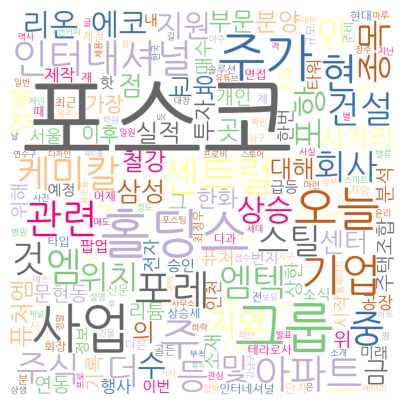

In [48]:
fig = plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

##### 클러스터별 워드클라우드 만들기

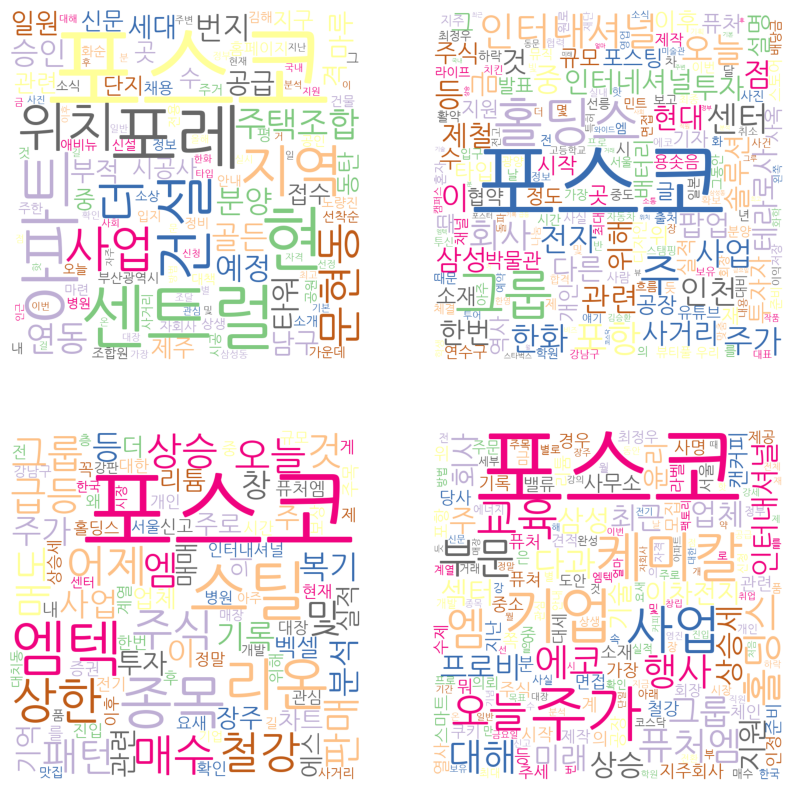

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    texts = df_descriptions.loc[df_descriptions['label']==i, "description"].to_list()
    wc = get_wordcloud(texts)
    axes[i//2, i%2].imshow(wc)
    axes[i//2, i%2].axis("off")
plt.show()